## IMPORTING LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
dataset=pd.read_csv("CarPrice.csv")
dataset.head(10)
dataset.shape


(205, 26)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [10]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [14]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [15]:
x=x.drop(['car_ID','symboling'],axis=1)

## EDA

In [16]:
total = x.isnull().sum().sort_values(ascending=False)#to find no of null values in each  column
total1=x.isnull().count().sort_values(ascending=False)
x.info()
percent = x.isnull().sum()/x.isnull().count().sort_values(
        ascending=False)*100
        
missing_data = pd.concat([total,percent], axis=1,
                         keys=['Total','Percent'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg   

C:\Users\Chandramouli\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [17]:
print(missing_data)

                  Total  Percent
CarName               0      0.0
aspiration            0      0.0
boreratio             0      0.0
carbody               0      0.0
carheight             0      0.0
carlength             0      0.0
carwidth              0      0.0
citympg               0      0.0
compressionratio      0      0.0
curbweight            0      0.0
cylindernumber        0      0.0
doornumber            0      0.0
drivewheel            0      0.0
enginelocation        0      0.0
enginesize            0      0.0
enginetype            0      0.0
fuelsystem            0      0.0
fueltype              0      0.0
highwaympg            0      0.0
horsepower            0      0.0
peakrpm               0      0.0
stroke                0      0.0
wheelbase             0      0.0


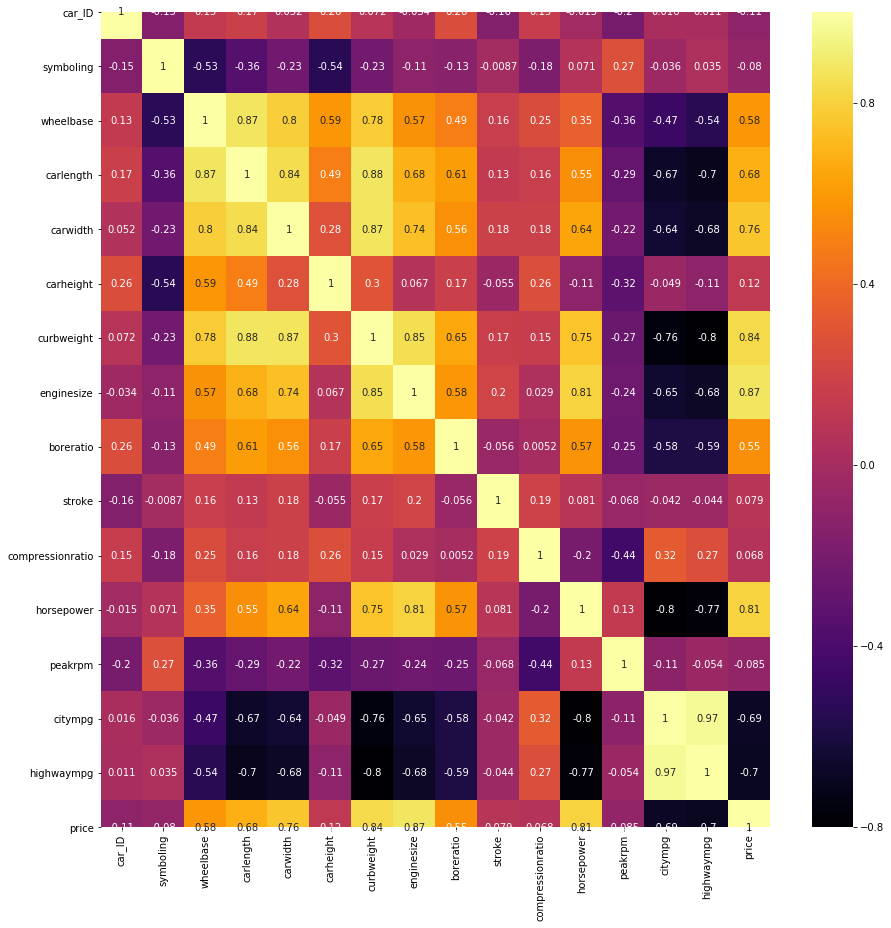

In [50]:
corr=dataset.corr()
corr.style.background_gradient(cmap="inferno")

plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(),annot=True,cmap='inferno')

In [19]:
x.dtypes
numerics = ['int64', 'float64']
cat_num=x.select_dtypes(include=numerics)

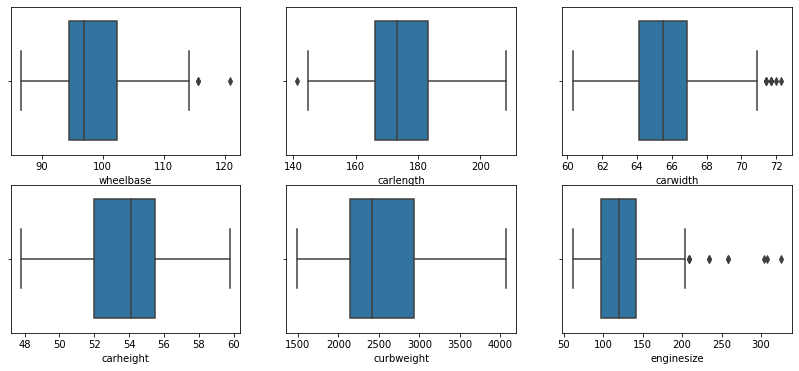

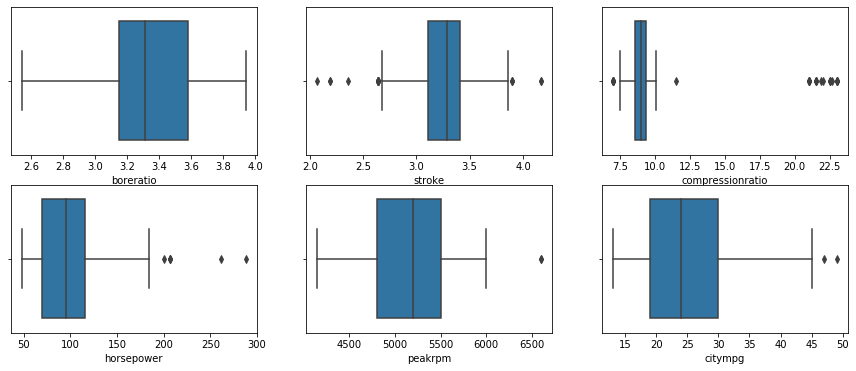

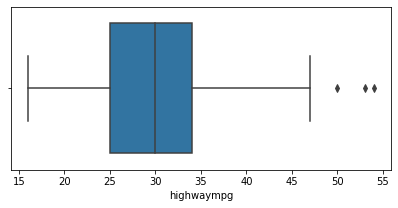

In [21]:
#outlier analysis
plt.figure(figsize=(14, 6))
plt.subplot(2,3,1)
sns.boxplot(x = 'wheelbase', data = cat_num)
plt.subplot(2,3,2)
sns.boxplot(x = 'carlength', data = cat_num)
plt.subplot(2,3,3)
sns.boxplot(x = 'carwidth', data = cat_num)
plt.subplot(2,3,4)
sns.boxplot(x = 'carheight', data = cat_num)
plt.subplot(2,3,5)
sns.boxplot(x = 'curbweight', data = cat_num)
plt.subplot(2,3,6)
sns.boxplot(x = 'enginesize', data = cat_num)
plt.figure(figsize=(15, 6))
plt.subplot(2,3,1)
sns.boxplot(x = 'boreratio', data = cat_num)
plt.subplot(2,3,2)
sns.boxplot(x = 'stroke', data = cat_num)
plt.subplot(2,3,3)
sns.boxplot(x = 'compressionratio', data = cat_num)
plt.subplot(2,3,4)
sns.boxplot(x = 'horsepower', data = cat_num)
plt.subplot(2,3,5)
sns.boxplot(x = 'peakrpm', data = cat_num)
plt.subplot(2,3,6)
sns.boxplot(x = 'citympg', data = cat_num)
plt.figure(figsize=(15, 3))
plt.subplot(1,2,1)
sns.boxplot(x = 'highwaympg', data = cat_num)

In [23]:
"""
# calculate the first quartile
Q1 = x.quantile(0.25)

#calculate the third quartile
Q3 = x.quantile(0.75)

# The Interquartile Range (IQR) is defined as difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1
print(IQR)
x_outliers = x[((x < (Q1 - 1.5 * IQR)) | (x > (Q3 + 1.5 * IQR))).any(axis=1)]
"""

wheelbase             7.90
carlength            16.80
carwidth              2.80
carheight             3.50
curbweight          790.00
enginesize           44.00
boreratio             0.43
stroke                0.30
compressionratio      0.80
horsepower           46.00
peakrpm             700.00
citympg              11.00
highwaympg            9.00
dtype: float64


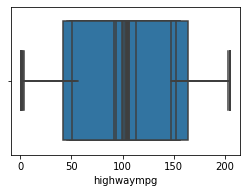

In [37]:
import warnings
warnings.filterwarnings("ignore")
#removing outliers
plt.figure(figsize=(14, 6))
plt.subplot(2,3,1)
sns.boxplot(x = 'wheelbase', data = cat_num)

cat_num['wheelbase']=cat_num['wheelbase'].rank()
#sns.boxplot(x = 'wheelbase', data = cat_num)  #checking
sns.boxplot(x = 'carlength', data = cat_num)
cat_num['carlength']=cat_num['carlength'].rank()

sns.boxplot(x = 'carwidth', data = cat_num)
cat_num['carwidth']=cat_num['carwidth'].rank()

sns.boxplot(x = 'carheight', data = cat_num)
cat_num['carheight']=cat_num['carheight'].rank()

sns.boxplot(x = 'curbweight', data = cat_num)
cat_num['curbweight']=cat_num['curbweight'].rank()

sns.boxplot(x = 'enginesize', data = cat_num)
cat_num['enginesize']=cat_num['enginesize'].rank()

sns.boxplot(x = 'boreratio', data = cat_num)
cat_num['boreratio']=cat_num['boreratio'].rank()

sns.boxplot(x = 'stroke', data = cat_num)
cat_num['stroke']=cat_num['stroke'].rank()

sns.boxplot(x = 'compressionratio', data = cat_num)
cat_num['compressionratio']=cat_num['compressionratio'].rank()

sns.boxplot(x = 'horsepower', data = cat_num)
cat_num['horsepower']=cat_num['horsepower'].rank()

sns.boxplot(x = 'peakrpm', data = cat_num)
cat_num['peakrpm']=cat_num['peakrpm'].rank()

sns.boxplot(x = 'citympg', data = cat_num)
cat_num['citympg']=cat_num['citympg'].rank()

sns.boxplot(x = 'highwaympg', data = cat_num)
cat_num['highwaympg']=cat_num['highwaympg'].rank()


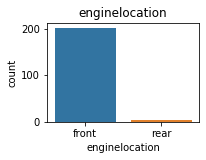

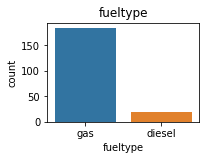

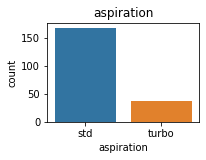

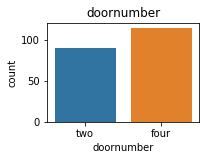

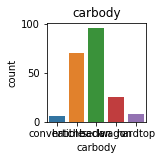

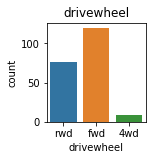

In [38]:
cat_features= x.select_dtypes(include='object')
def plotgraph(cat_features,colname):
    sns.countplot(x=colname,data=cat_features)
    plt.title(colname)
    plt.show()

plt.subplot(2,2,1)
plotgraph(cat_features,'enginelocation')
plt.subplot(2,2,2)
plotgraph(cat_features,'fueltype')
plt.subplot(2,2,3)
plotgraph(cat_features,'aspiration')
plt.subplot(2,2,4)
plotgraph(cat_features,'doornumber')
plt.subplot(2,3,5)
plotgraph(cat_features,'carbody')
plt.subplot(2,3,6)
plotgraph(cat_features,'drivewheel')
plt.show()


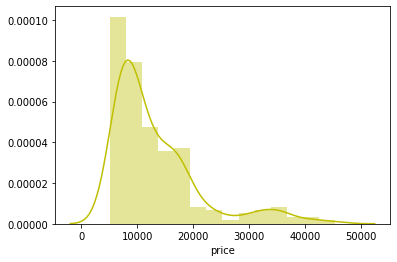

In [45]:
sns.distplot(dataset['price'],color="y")

Inferences
1)The engine is mostly located in the front of the car
2)Most of the cars use gas as their fuel
3)The aspiration employed by most vehicles is std (standard)
4)Just over half the cars sold have four doors
5)The most popular car body is sedan
6)Most of the cars have a fwd drive 

In [39]:
x['CarName'] = x['CarName'].str.split('-').str[0]#to get the brand names
x['CarName'] = x['CarName'].str.split(' ').str[0]#to get the brand names

x['CarName'] = x['CarName'].str.lower()

x['CarName'] = x['CarName'].str.replace('vw','volkswagen')
x['CarName'] = x['CarName'].str.replace('maxda','mazda')
x['CarName'] = x['CarName'].str.replace('vokswagen','volkswagen')
x['CarName'] = x['CarName'].str.replace('toyouta','toyota')

x['drivewheel'] = x['drivewheel'].str.replace('4wd','fwd')

cat_features['CarName'] = cat_features['CarName'].str.split('-').str[0]#to get the brand names
cat_features['CarName'] = cat_features['CarName'].str.split(' ').str[0]#to get the brand names

cat_features['CarName'] = cat_features['CarName'].str.lower()

cat_features['CarName'] = cat_features['CarName'].str.replace('vw','volkswagen')
cat_features['CarName'] = cat_features['CarName'].str.replace('maxda','mazda')
cat_features['CarName'] = cat_features['CarName'].str.replace('vokswagen','volkswagen')
cat_features['CarName'] = cat_features['CarName'].str.replace('toyouta','toyota')

cat_features['drivewheel'] = cat_features['drivewheel'].str.replace('4wd','fwd')

x_cat=pd.get_dummies(cat_features)
#dropping columns 
x_cat.info()
x_cat=x_cat.drop(['CarName_alfa' ,'fueltype_diesel','aspiration_std','doornumber_four','carbody_convertible','drivewheel_rwd','enginelocation_front','enginetype_dohc','cylindernumber_eight','fuelsystem_1bbl'],axis=1)

x1=pd.concat([x_cat,cat_num],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
CarName_alfa             205 non-null uint8
CarName_audi             205 non-null uint8
CarName_bmw              205 non-null uint8
CarName_buick            205 non-null uint8
CarName_chevrolet        205 non-null uint8
CarName_dodge            205 non-null uint8
CarName_honda            205 non-null uint8
CarName_isuzu            205 non-null uint8
CarName_jaguar           205 non-null uint8
CarName_mazda            205 non-null uint8
CarName_mercury          205 non-null uint8
CarName_mitsubishi       205 non-null uint8
CarName_nissan           205 non-null uint8
CarName_peugeot          205 non-null uint8
CarName_plymouth         205 non-null uint8
CarName_porcshce         205 non-null uint8
CarName_porsche          205 non-null uint8
CarName_renault          205 non-null uint8
CarName_saab             205 non-null uint8
CarName_subaru           205 non-null uint8
CarName_toyota 

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x1,y,test_size = 0.3, random_state = 100)

## Correlation VIF

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    
def vif_calc(X):
  import numpy as np
  thresh=3
  cols = x_train.columns
  variables = np.arange(x_train.shape[1])
  dropped=True
  while dropped:
       dropped=False
       c = x_train[cols[variables]].values
       vif = [variance_inflation_factor(c, i) for i in np.arange(c.shape[1])]
       maxloc = vif.index(max(vif))
       if max(vif) > thresh:
        print('dropping \'' + x_train[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
        variables = np.delete(variables, maxloc)
        dropped=True
  print('Remaining variables:')
  print(x_train.columns[variables])
  return x_train[cols[variables]]

In [42]:
vif=vif_calc(x_train)
x_train1=vif
set(x_test)-set(x_train1)#to find out unique columns in train compared to test

dropping 'CarName_peugeot' at index: 12
dropping 'CarName_subaru' at index: 17
dropping 'enginetype_rotor' at index: 34
dropping 'fueltype_gas' at index: 20
dropping 'citympg' at index: 57
dropping 'cylindernumber_four' at index: 34
dropping 'horsepower' at index: 54
dropping 'enginesize' at index: 50
dropping 'carlength' at index: 46
dropping 'curbweight' at index: 48
dropping 'carwidth' at index: 46
dropping 'enginetype_ohc' at index: 30
dropping 'carbody_sedan' at index: 24
dropping 'highwaympg' at index: 49
dropping 'fuelsystem_mpfi' at index: 40
dropping 'wheelbase' at index: 42
dropping 'stroke' at index: 44
dropping 'drivewheel_fwd' at index: 25
dropping 'carheight' at index: 41
dropping 'compressionratio' at index: 42
dropping 'peakrpm' at index: 42
dropping 'boreratio' at index: 41
dropping 'cylindernumber_five' at index: 30
dropping 'cylindernumber_two' at index: 33
dropping 'fuelsystem_2bbl' at index: 33
dropping 'carbody_hatchback' at index: 23
dropping 'cylindernumber_six'

{'CarName_peugeot',
 'CarName_porsche',
 'CarName_subaru',
 'boreratio',
 'carbody_hatchback',
 'carbody_sedan',
 'carheight',
 'carlength',
 'carwidth',
 'citympg',
 'compressionratio',
 'curbweight',
 'cylindernumber_five',
 'cylindernumber_four',
 'cylindernumber_six',
 'cylindernumber_two',
 'drivewheel_fwd',
 'enginesize',
 'enginetype_ohc',
 'enginetype_rotor',
 'fuelsystem_2bbl',
 'fuelsystem_mpfi',
 'fueltype_gas',
 'highwaympg',
 'horsepower',
 'peakrpm',
 'stroke',
 'wheelbase'}

In [51]:
x_test1=x_test.drop(['CarName_peugeot',
 'CarName_porsche',
 'CarName_subaru',
 'boreratio',
 'carbody_hatchback',
 'carbody_sedan',
 'carheight',
 'carlength',
 'carwidth',
 'citympg',
 'compressionratio',
 'curbweight',
 'cylindernumber_five',
 'cylindernumber_four',
 'cylindernumber_six',
 'cylindernumber_two',
 'drivewheel_fwd',
 'enginesize',
 'enginetype_ohc',
 'enginetype_rotor',
 'fuelsystem_2bbl',
 'fuelsystem_mpfi',
 'fueltype_gas',
 'highwaympg',
 'horsepower',
 'peakrpm',
 'stroke',
 'wheelbase'],axis=1)
    

##  PREDICTION

In [52]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train1,y_train)#gives line of best fit
regression.coef_
regression.intercept_

15930.33406484685

In [53]:
y_pred=regression.predict(x_test1)


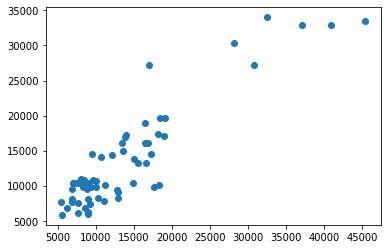

In [54]:
plt.scatter(y_test,y_pred)

In [56]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8202651075431371

### RIDGE AND LASSO-Optimization techniques for regression models to reduce overfitting

In [57]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[0,1e-10,1e-15,1,2,5,10,50,100]}#1e-10=0.000000001#for hyperparmeter tuning
ridge_grid=GridSearchCV(ridge,param_grid=parameters,scoring='r2',cv=10)
ridge_grid.fit(x_train,y_train)
ridge_grid.best_params_#{'alpha': 10}
ridge_grid.best_score_#0.80

C:\Users\Chandramouli\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.7988251635508001

In [58]:
from sklearn.linear_model import Lasso
lasso=Lasso()
from sklearn.model_selection import GridSearchCV

parameters={'alpha':[0,1e-10,1e-15,1,2,5,10,50,100]}#1e-10=0.000000001#for hyperparmeter tuning
lasso_grid=GridSearchCV(lasso,param_grid=parameters,scoring='r2',cv=10)
lasso_grid.fit(x_train,y_train)
lasso_grid.best_params_
lasso_grid.best_score_#0.81

C:\Users\Chandramouli\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8088860027371544

### PCA

In [60]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x2=scale.fit_transform(cat_num)
x2=pd.DataFrame(x2)
cat_num.columns
x2.columns=cat_num.columns
x3=pd.concat([x_cat,x2],axis=1)
#train test split
from sklearn.model_selection import train_test_split
x_train_pca, x_test_pca,y_train_pca,y_test_pca = train_test_split(x3,y,test_size = 0.3, random_state = 100)


from sklearn.decomposition import PCA
pca=PCA()#pca(n_compo=5) will take top 5 feature out of 13 if nothing is given it will take all 13

x_train_pca=pca.fit_transform(x_train)#fing eigen values,eigen vectors and sort it by descending order
x_test_pca=pca.transform(x_test)
explained_ratio=pca.explained_variance_ratio_#features(columns) is in order of descending sort

import numpy as np
np.cumsum(explained_ratio)#cumulative sum out of 13 features up 9 features its 95 percent so we can remove other 4
#but column name is not orderly hence we dont know what can be removed so this is PCA

####
from sklearn.decomposition import PCA
pca=PCA(n_components=10)#pca(n_compo=10) will take top 10 feature out of 63 since they contribute more

x_train_pca=pca.fit_transform(x_train)#find eigen values,eigen vectors and sort it by descending order
x_test_pca=pca.transform(x_test)
explained_ratio=pca.explained_variance_ratio_#features(columns) is in order of descending sort

import numpy as np
np.cumsum(explained_ratio)


from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train_pca,y_train_pca)#gives line of best fit
regression.coef_
regression.intercept_

y_pred_pca=regression.predict(x_test_pca)


from sklearn.metrics import r2_score

r2_score(y_test_pca, y_pred_pca)


0.5962791060438444

### OLS
### backward elimination

In [61]:
import statsmodels.api as sm #for stats model always we need to give intercept#for sk learn no need to give intercept
x1['intercept']=1
x1_ols=x1
reg_OLS=sm.OLS(y,x1_ols).fit()#ordinary least square
reg_OLS.summary()
#dropping CarName_audi  p>0.05
x1_ols=x1_ols.drop(['CarName_audi'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()#ordinary least square
reg_OLS.summary()
#dropping citympg  p>0.05
x1_ols=x1_ols.drop(['citympg'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping horsepower p>0.05
x1_ols=x1_ols.drop(['horsepower'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping fuelsystem_mfi p>0.05
x1_ols=x1_ols.drop(['fuelsystem_mfi'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping CarName_porcshce p>0.05
x1_ols=x1_ols.drop(['CarName_porcshce'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping fuelsystem_4bbl p>0.05
x1_ols=x1_ols.drop(['fuelsystem_4bbl'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping CarName_saab p>0.05
x1_ols=x1_ols.drop(['CarName_saab'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping fuelsystem_idi p>0.05
x1_ols=x1_ols.drop(['fuelsystem_idi'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping enginetype_l p>0.05
x1_ols=x1_ols.drop(['enginetype_l'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping drivewheel_fwd p>0.05
x1_ols=x1_ols.drop(['drivewheel_fwd'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping fuelsystem_spdi p>0.05
x1_ols=x1_ols.drop(['fuelsystem_spdi'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping fuelsystem_spfi p>0.05
x1_ols=x1_ols.drop(['fuelsystem_spfi'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping doornumber_two p>0.05
x1_ols=x1_ols.drop(['doornumber_two'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping CarName_jaguar p>0.05
x1_ols=x1_ols.drop(['CarName_jaguar'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping cylindernumber_three p>0.05
x1_ols=x1_ols.drop(['cylindernumber_three'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping cylindernumber_two p>0.05
x1_ols=x1_ols.drop(['cylindernumber_two'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping enginetype_rotor p>0.05
x1_ols=x1_ols.drop(['enginetype_rotor'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping enginetype_ohc p>0.05
x1_ols=x1_ols.drop(['enginetype_ohc'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping cylindernumber_twelve p>0.05
x1_ols=x1_ols.drop(['cylindernumber_twelve'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping stroke p>0.05
x1_ols=x1_ols.drop(['stroke'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping carbody_hardtop p>0.05
x1_ols=x1_ols.drop(['carbody_hardtop'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping carbody_sedan p>0.05
x1_ols=x1_ols.drop(['carbody_sedan'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping carbody_wagon p>0.05
x1_ols=x1_ols.drop(['carbody_wagon'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping highwaympg p>0.05
x1_ols=x1_ols.drop(['highwaympg'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping enginetype_dohcv p>0.05
x1_ols=x1_ols.drop(['enginetype_dohcv'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping CarName_porsche p>0.05
x1_ols=x1_ols.drop(['CarName_porsche'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping aspiration_turbo p>0.05
x1_ols=x1_ols.drop(['aspiration_turbo'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping fuelsystem_mpfi p>0.05
x1_ols=x1_ols.drop(['fuelsystem_mpfi'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping CarName_mercury p>0.05
x1_ols=x1_ols.drop(['CarName_mercury'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping CarName_volvo p>0.05
x1_ols=x1_ols.drop(['CarName_volvo'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping wheelbase p>0.05
x1_ols=x1_ols.drop(['wheelbase'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()
#dropping fuelsystem_2bbl p>0.05
x1_ols=x1_ols.drop(['fuelsystem_2bbl'],axis=1)
reg_OLS=sm.OLS(y,x1_ols).fit()
reg_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     59.75
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           3.37e-76
Time:                        18:12:31   Log-Likelihood:                -1883.9
No. Observations:                 205   AIC:                             3830.
Df Residuals:                     174   BIC:                             3933.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
CarName_bmw          4973.8812   1335.997      3.723      0.000    2337.036    7610.727
CarName_buick        1.071e+04   1491.674      7.178      0.000    7763.299    1.37e+04
CarName_chevrolet   -5470.4493   1803.085     -3.034      0.003   -9029.182   -1911.716
CarName_dodge       -5899.2939   1235.103     -4.776      0.000   -8337.006   -3461.582
CarName_honda       -4917.1044   1152.314     -4.267      0.000   -7191.416   -2642.792
CarName_isuzu       -4033.0020   1558.449     -2.588      0.010   -7108.899    -957.105
CarName_mazda       -5842.1908    987.095     -5.919      0.000   -7790.411   -3893.970
CarName_mitsubishi  -7671.5745   1139.012     -6.735      0.000   -9919.633   -5423.516
CarName_nissan      -4931.0217    982.635     -5.018      0.000   -6870.439   -2991.604
CarName_peugeot     -4404.1294   1102.025     -3.996      0.000   -6579.186   -2229.073
CarName_plymouth    -5989.1997   1294.918     -4.625      0.000   -8544.968   -3433.431
CarName_renault     -8500.9634   1946.999     -4.366      0.000   -1.23e+04   -4658.188
CarName_subaru      -8169.8858   1043.773     -7.827      0.000   -1.02e+04   -6109.799
CarName_toyota      -5690.4262    838.477     -6.787      0.000   -7345.321   -4035.531
CarName_volkswagen  -4889.4500   1031.436     -4.740      0.000   -6925.187   -2853.713
fueltype_gas        -1488.0663   1142.632     -1.302      0.195   -3743.270     767.137
carbody_hatchback   -1322.1923    495.655     -2.668      0.008   -2300.462    -343.923
enginelocation_rear  1.019e+04   1437.162      7.087      0.000    7349.140     1.3e+04
enginetype_ohcf      2015.7683    922.934      2.184      0.030     194.181    3837.356
enginetype_ohcv     -2030.3417   1245.320     -1.630      0.105   -4488.219     427.536
cylindernumber_five -8376.5781   1576.235     -5.314      0.000   -1.15e+04   -5265.576
cylindernumber_four -6300.3408   1266.550     -4.974      0.000   -8800.120   -3800.562
cylindernumber_six  -2636.1804   1458.867     -1.807      0.072   -5515.534     243.173
carlength             -19.2320     11.537     -1.667      0.097     -42.002       3.538
carwidth               30.0971      9.728      3.094      0.002      10.898      49.296
carheight             -13.9110      5.286     -2.632      0.009     -24.344      -3.478
curbweight             36.4041     11.751      3.098      0.002      13.212      59.596
enginesize             10.3918     11.176      0.930      0.354     -11.666      32.450
boreratio               0.6255      8.610      0.073      0.942     -16.369      17.620
compressionratio      -14.8587      5.056     -2.939      0.004     -24.838      -4.879
peakrpm                 2.3186      5.663      0.409      0.683      -8.859      13.497
intercept            2.097e+04   2539.385      8.257      0.000     1.6e+04     2.6e+04
===

In [64]:
reg_OLS.rsquared_adj
reg_OLS.rsquared

0.9115243566816633

In [65]:
x1_ols=x1_ols.drop(['intercept'],axis=1)
from sklearn.model_selection import train_test_split
x_train_ols, x_test_ols,y_train_ols,y_test_ols = train_test_split(x1_ols,y,test_size = 0.3, random_state = 100)

In [66]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train_ols,y_train_ols)#gives line of best fit
regression.coef_
regression.intercept_

20952.18054028123

In [67]:
y_pred_ols=regression.predict(x_test_ols)

0.8777416267476051
<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 31 columns):
CarName_bmw            143 non-null uint8
CarName_buick          143 non-null uint8
CarName_chevrolet      143 non-null uint8
CarName_dodge          143 non-null uint8
CarName_honda          143 non-null uint8
CarName_isuzu          143 non-null uint8
CarName_mazda          143 non-null uint8
CarName_mitsubishi     143 non-null uint8
CarName_nissan         143 non-null uint8
CarName_peugeot        143 non-null uint8
CarName_plymouth       143 non-null uint8
CarName_renault        143 non-null uint8
CarName_subaru         143 non-null uint8
CarName_toyota         143 non-null uint8
CarName_volkswagen     143 non-null uint8
fueltype_gas           143 non-null uint8
carbody_hatchback      143 non-null uint8
enginelocation_rear    143 non-null uint8
enginetype_ohcf        143 non-null uint8
enginetype_ohcv        143 non-null uint8
cylindernumber_five    143 non-null 

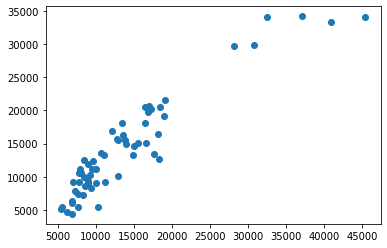

In [68]:

from sklearn.metrics import r2_score

r2_ols = r2_score(y_test_ols, y_pred_ols)#0.93
print(r2_ols)
plt.scatter(y_test_ols,y_pred_ols)

x_train_ols.info()

In [ ]:
#Final inference
#The important features that dictate the price of the cars are fueltype_gas,carbody_hatchback,enginelocation_rear,enginetype_ohcf,
#enginetype_ohcv,cylindernumber_five,cylindernumber_four,cylindernumber_six,carlength,carwidth,carheight,curbweight,enginesize,boreratio,compressionratio,peakrpm